## EmployeeSQL
### Bonus Analysis



In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sqlalchemy import create_engine

## Set Matplotlib style
plt.style.use('default')

## Import database parameters
from config import db_host, db_name, db_user, db_password

### 1. Set database connection

In [2]:
## Set SQLAlchemy Parameters
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}')
connection = engine.connect()

In [3]:
## Get table names
print(engine.table_names())

['title', 'employee', 'dept_employee', 'department', 'dept_manager', 'salary']


### 2. Import salary data from PostgreSQL database into Pandas

In [4]:
## Build SQL statement
sql_statement = "SELECT * FROM salary"

In [5]:
## Retrieve salary data from "salary" table into DataFrame
salary_df = pd.read_sql(sql_statement, connection)

## Set index
salary_df.set_index('emp_no', drop=True, inplace=True)

## If null values, replace with 0
if salary_df.isnull().values.any():
    salary_df = salary_df.fillna(0)

## Show DataFrame
salary_df

,salary
emp_no,
10001,60117
10002,65828
10003,40006
10004,40054
10005,78228
...,...
499995,40000
499996,58058
499997,49597


### 3. Visualize  most common salary ranges for employees (histogram)

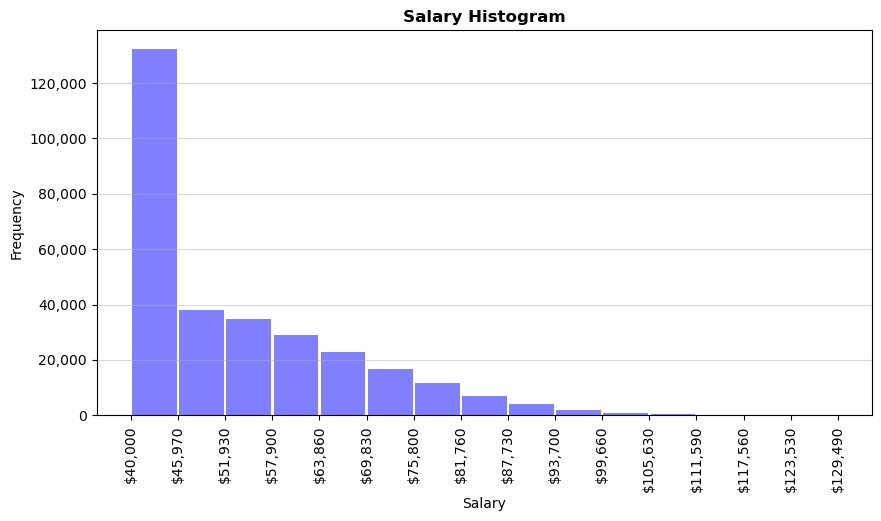

In [22]:
## Set x as salary values list
x = salary_df['salary']

## Set figure size
plt.figure(figsize=(10,5))
## Plot histogram
n, bins, patches = plt.hist(x, bins=15, color='blue', alpha=0.5, rwidth=0.95)

## Set plot title and labels
plt.title('Salary Histogram', fontweight="bold")
plt.xlabel('Salary')
plt.ylabel('Frequency')

## Set x-axis labels & format
x_labels = [f"${round(i/100,1)*100:,.0f}" for i in bins]
plt.xticks(bins, x_labels, rotation=90)

## Set y-axis format
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

## Set grid
plt.grid(axis='y', alpha=0.5)
## Save plot
plt.savefig('Images/Histogram.png', bbox_inches = 'tight')
## Display plot
plt.show()

### 4. Import salary summary from PostgreSQL database into Pandas

In [7]:
## Build SQL statement
sql_statement = 'SELECT t.title_name, COUNT(e.emp_no) AS "emp_count", AVG(s.salary) AS "salary_avg" \
                FROM employee AS e \
                LEFT JOIN title AS t ON e.title_id = t.title_id \
                LEFT JOIN salary AS s ON e.emp_no = s.emp_no \
                GROUP BY t.title_name \
                ORDER BY "emp_count" DESC;'

In [8]:
## Retrieve salary summary from SQL group by result into DataFrame
summary_df = pd.read_sql(sql_statement, connection)

## Set index
summary_df.set_index('title_name', drop=True, inplace=True)

## Show DataFrame
summary_df

,emp_count,salary_avg
title_name,,
Staff,107384,58465.382850
Senior Engineer,97747,48506.799871
Engineer,47303,48535.336511
Senior Staff,26583,58550.172704
Technique Leader,15148,48582.896092
Assistant Engineer,5835,48564.434447
Manager,24,51531.041667


### 5. Visualize average salary per job title (bar chart)

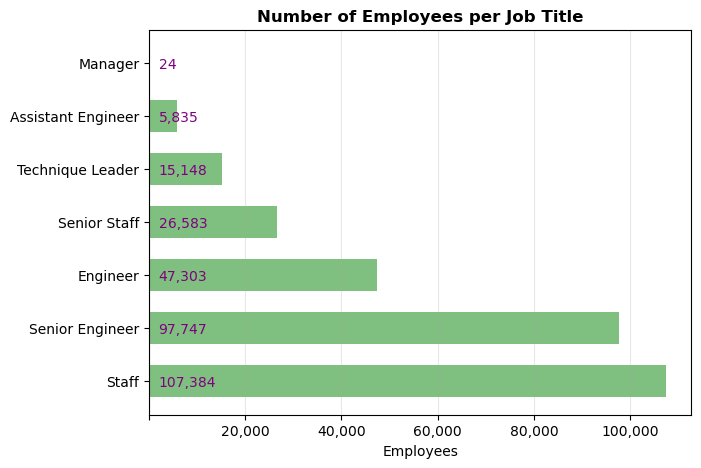

In [23]:
x = summary_df['emp_count']
y = summary_df.index

plt.figure(figsize=(7,5))
plt.barh(y, width=x, height=0.6, color='green', alpha=0.5)

plt.title('Number of Employees per Job Title', fontweight="bold")
plt.ylabel('')
plt.xlabel('Employees')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)

## Display values
for i in range(len(x)):
    plt.text(2000, i-.1, f"{x[i]:,}", color='purple')

## Set grid
plt.grid(axis='x', alpha=0.3)
## Save plot
plt.savefig('Images/Employee_Count.png', bbox_inches = 'tight')
## Display plot
plt.show()

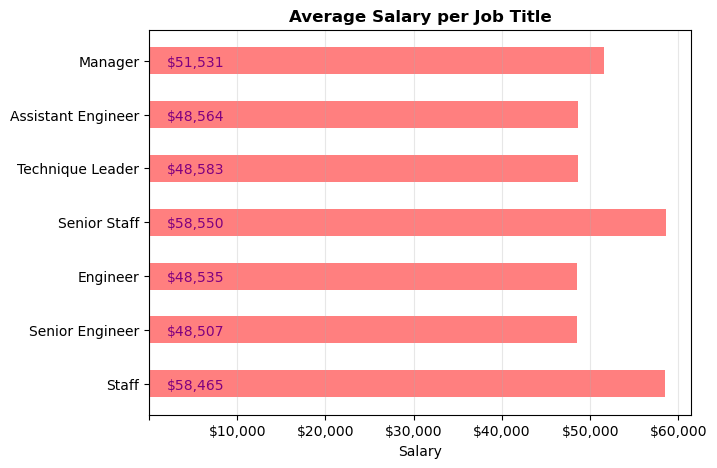

In [24]:
x = summary_df['salary_avg']
y = summary_df.index

plt.figure(figsize=(7,5))
plt.barh(y, width=x, height=0.5, color='red', alpha=0.5)

plt.title('Average Salary per Job Title', fontweight="bold")
plt.ylabel('')
plt.xlabel('Salary')

## Display values
for i in range(len(x)):
    plt.text(2000, i-.1, f"${x[i]:,.0f}", color='purple')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)

## Set grid
plt.grid(axis='x', alpha=0.3)
## Save plot
plt.savefig('Images/Salary_Average.png', bbox_inches = 'tight')
## Display plot
plt.show()

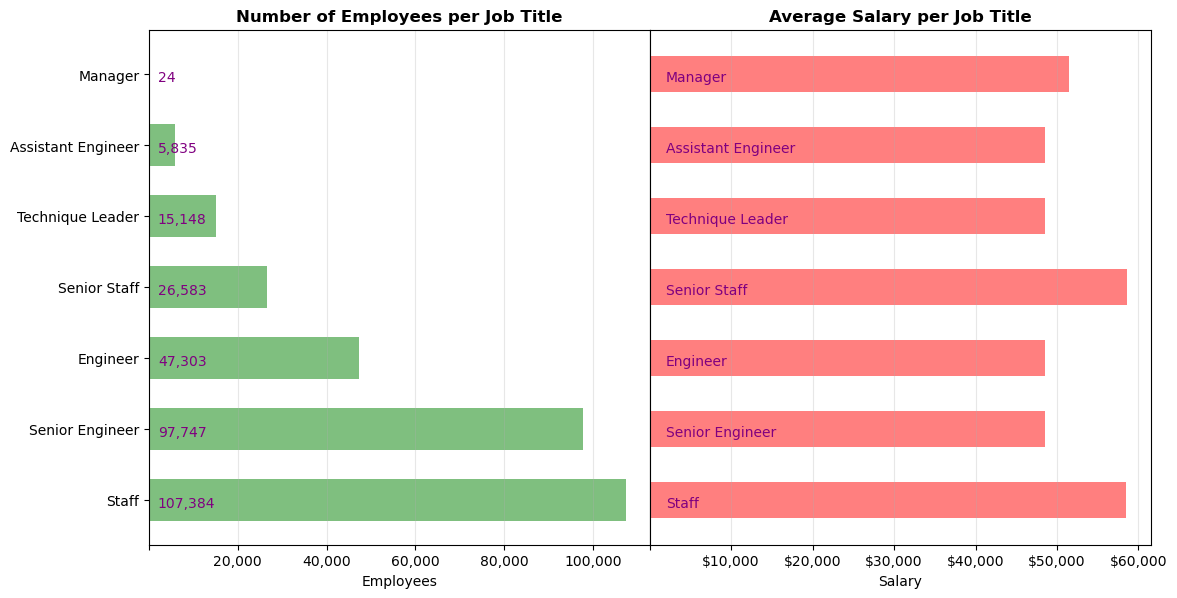

In [15]:
x1 = summary_df['emp_count']
x2 = summary_df['salary_avg']
y = summary_df.index

## SET FIGURE, AXES
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.tight_layout(pad=-1.6)

## SUBPLOT [0]
ax[0].barh(y, width=x1, height=0.6, color='green', alpha=0.5)

ax[0].set_title('Number of Employees per Job Title', fontweight="bold")
ax[0].set_xlabel('Employees')
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].xaxis.get_major_ticks()[0].label1.set_visible(False)

## Display values
for i in range(len(x)):
   ax[0].text(2000, i-.1, f"{x1[i]:,.0f}", color='purple')

## SUBPLOT [1]
ax[1].barh(y, width=x2, height=0.5, color='red', alpha=0.5)

ax[1].set_title('Average Salary per Job Title', fontweight="bold")
ax[1].set_xlabel('Salary')
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax[1].xaxis.get_major_ticks()[0].label1.set_visible(False)

ax[1].yaxis.set_tick_params(which='major', left=False, right=False)


## Display labels
for i in range(len(x)):
    ax[1].text(2000, i-.1, y[i], color='purple')

ax[0].grid(axis='x', alpha=0.3)
ax[1].grid(axis='x', alpha=0.3)

## Save plot
plt.savefig('Images/Employee_Salary.png', bbox_inches = 'tight')
## Display plot
plt.show()